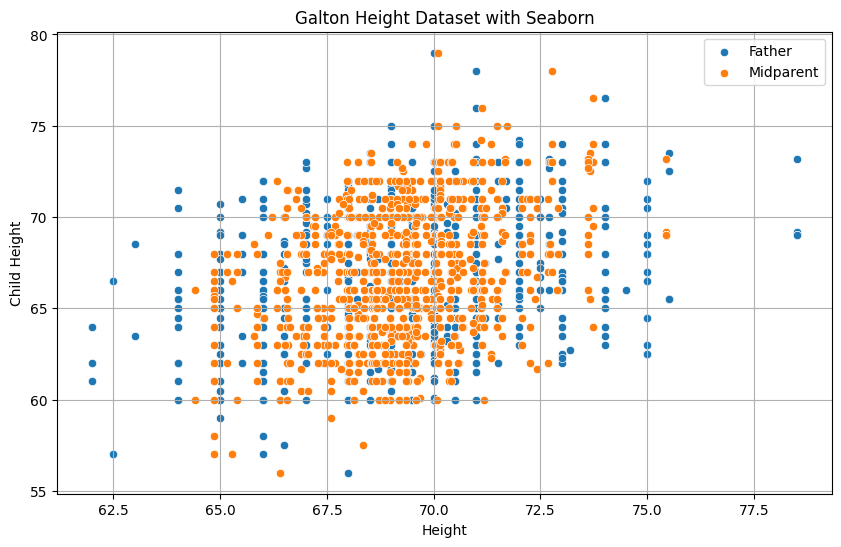

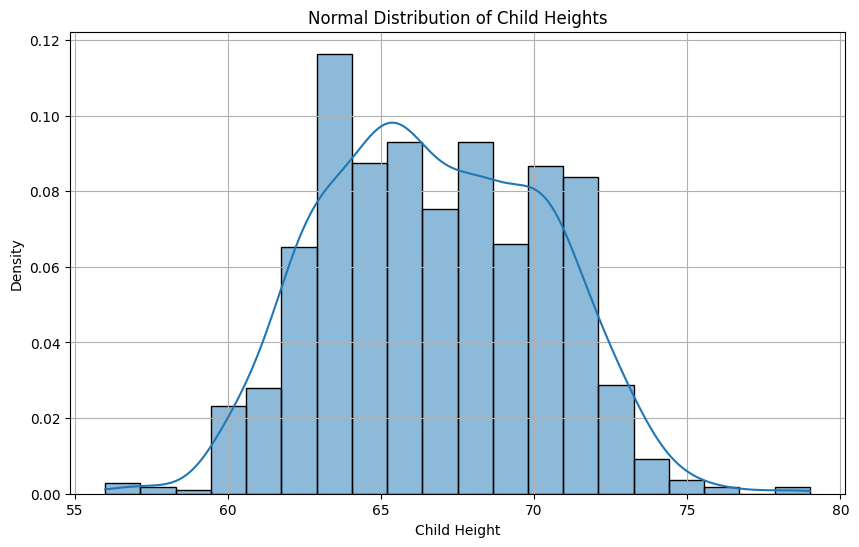

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Plot the heights of fathers and sons using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='father', y='childHeight', label='Father')
sns.scatterplot(data=data, x='midparentHeight', y='childHeight', label='Midparent')
plt.xlabel('Height')
plt.ylabel('Child Height')
plt.title('Galton Height Dataset with Seaborn')
plt.legend()
plt.grid(True)
plt.show()

# Plot the normal distribution of child heights
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='childHeight', kde=True, stat='density', bins=20)
plt.xlabel('Child Height')
plt.ylabel('Density')
plt.title('Normal Distribution of Child Heights')
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = data[['father', 'mother', 'midparentHeight', 'childHeight']]
y = data['gender']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

      female       0.89      0.86      0.88        95
        male       0.86      0.89      0.88        92

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



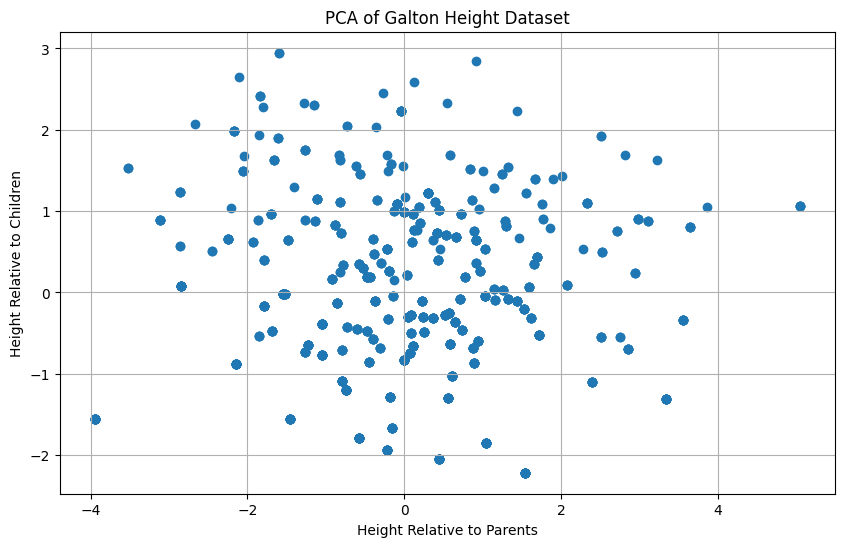

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Selecting relevant features and standardizing the data
X = data[['father', 'mother', 'midparentHeight', 'children']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Get the principal component loadings
loadings = pca.components_

# Create a DataFrame for the PCA results with real feature names
pca_df = pd.DataFrame(data=pca_result, columns=['Height_Relative_to_Parents', 'Height_Relative_to_Children'])

# Plotting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Height_Relative_to_Parents'], pca_df['Height_Relative_to_Children'])
plt.title('PCA of Galton Height Dataset')
plt.xlabel('Height Relative to Parents')
plt.ylabel('Height Relative to Children')
plt.grid(True)
plt.show()

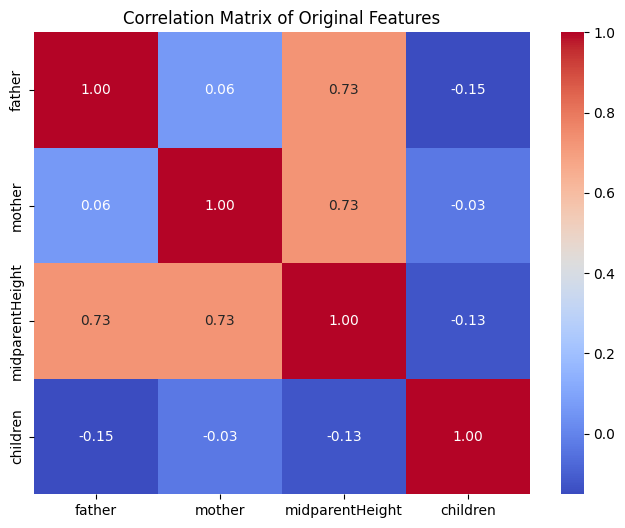

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

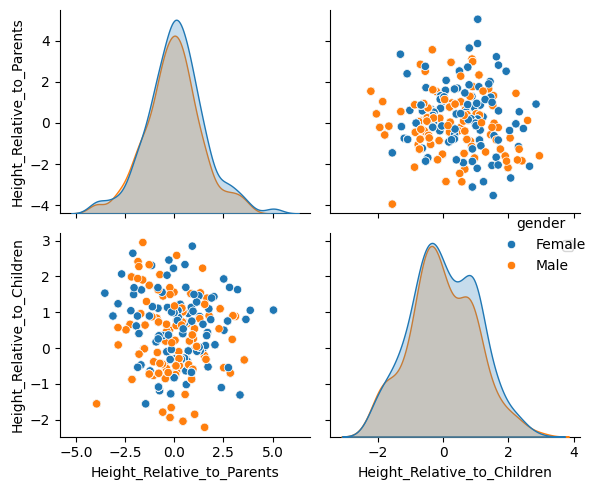

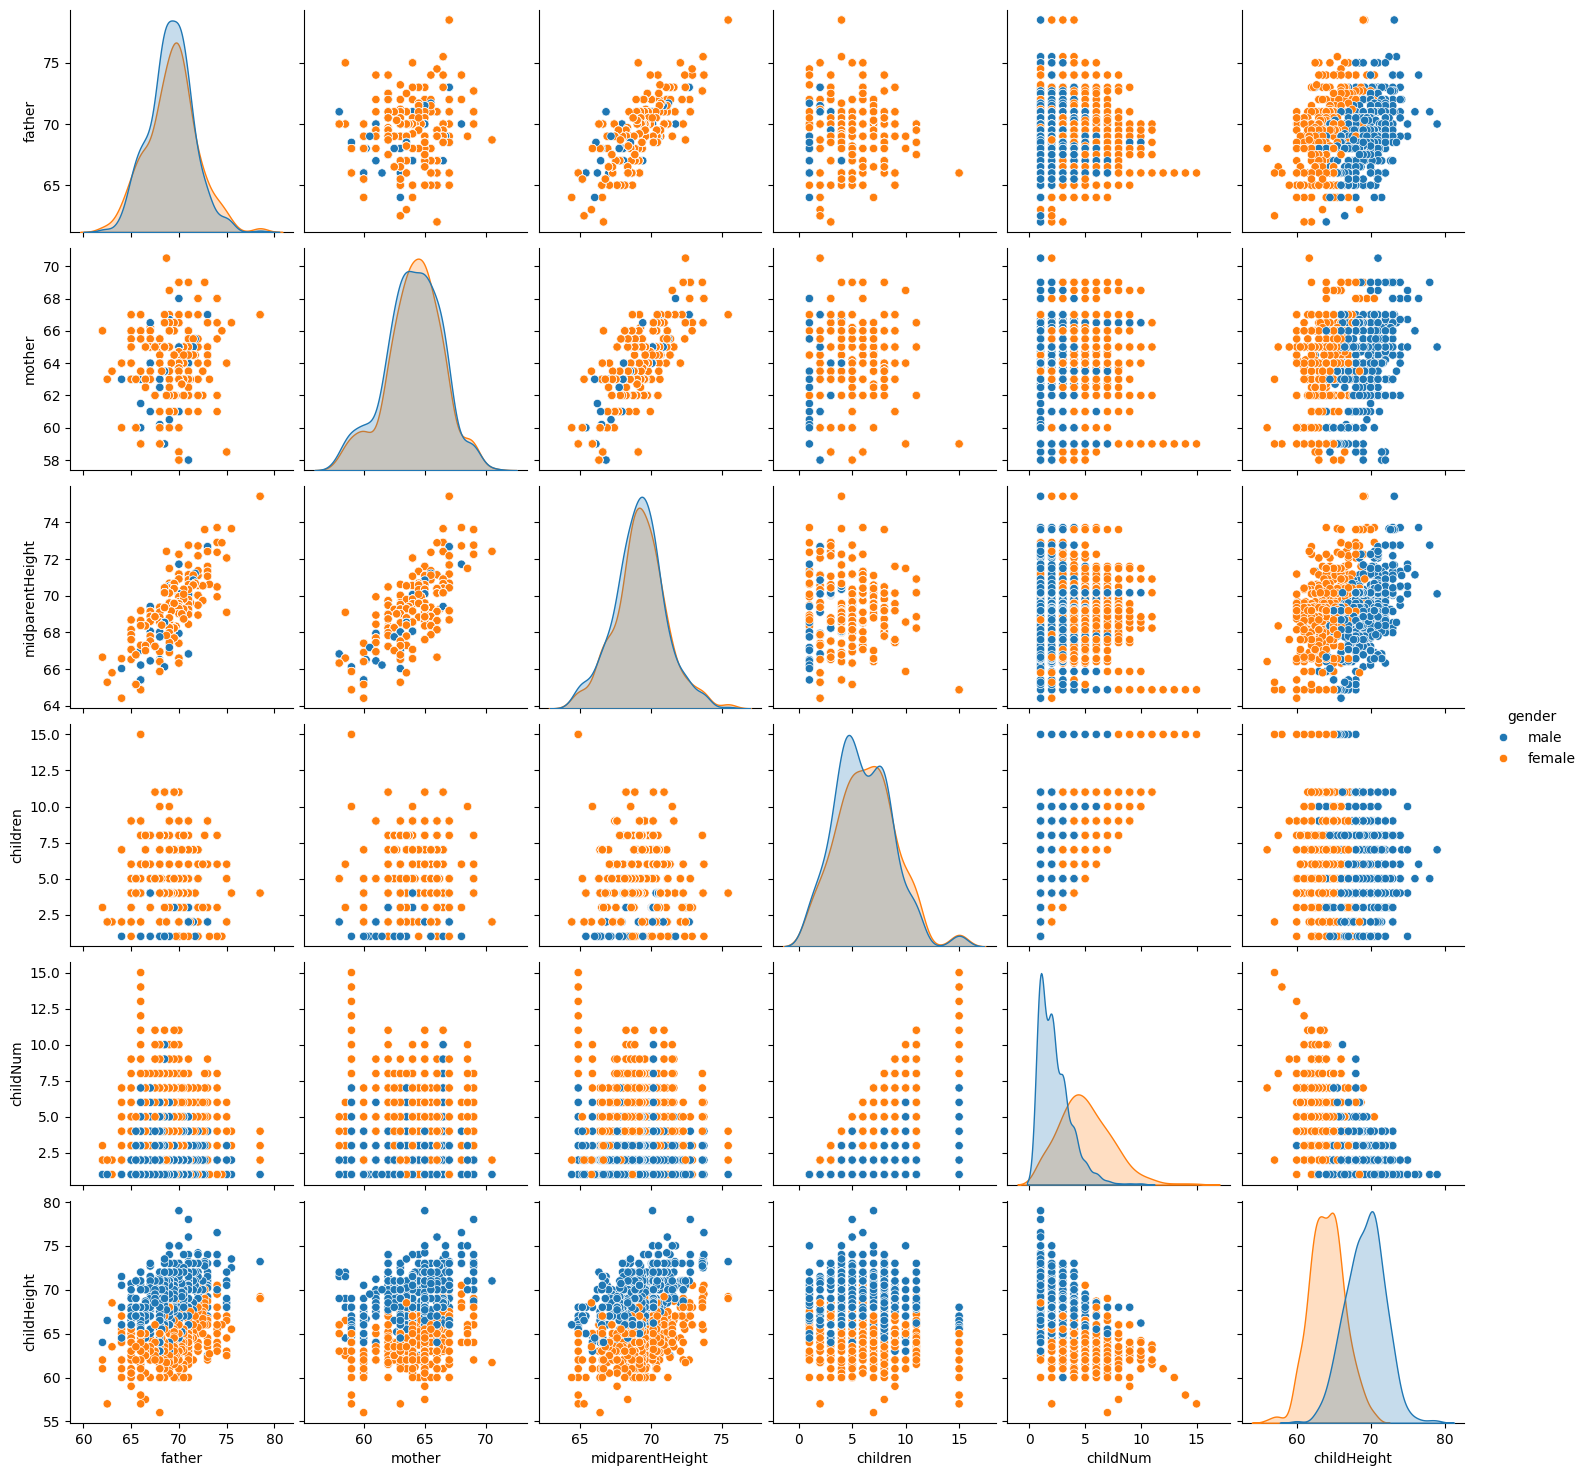

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Selecting relevant features and standardizing the data
X = data[['father', 'mother', 'midparentHeight', 'children']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Get the principal component loadings
loadings = pca.components_

# Create a DataFrame for the PCA results with real feature names
pca_df = pd.DataFrame(data=pca_result, columns=['Height_Relative_to_Parents', 'Height_Relative_to_Children'])

# Calculate the correlation matrix from the original standardized data
correlation_matrix = pd.DataFrame(X_scaled, columns=['father', 'mother', 'midparentHeight', 'children']).corr()

# Adding a dummy 'gender' column to pca_df for demonstration purposes
# This column is added with random gender labels for demonstration
import random
gender_labels = ['Male', 'Female']
pca_df['gender'] = [random.choice(gender_labels) for _ in range(len(pca_df))]

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Original Features')
plt.show()

# Plot the pair plot
plt.figure(figsize=(10, 6))
pairplot = sns.pairplot(pca_df, hue='gender')  # Using 'gender' as hue
pairplot.fig.subplots_adjust(top=0.9)  # Adjust top margin to make space for legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))  # Move legend to top right corner
plt.tight_layout()  # Adjusts subplot parameters
plt.show()

pairplot = sns.pairplot(data, hue='gender')


In [47]:
import pandas as pd
import statsmodels.api as sm

# Load the Galton dataset
galton_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Display the first few rows of the dataset
print(galton_data.head())


  family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  


In [49]:
import pandas as pd
import statsmodels.api as sm

# Load the Galton dataset
galton_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Save the dataset to an Excel file
excel_file_path = "galton_data.xlsx"
galton_data.to_excel(excel_file_path, index=False)

print("Dataset saved to:", excel_file_path)


Dataset saved to: galton_data.xlsx


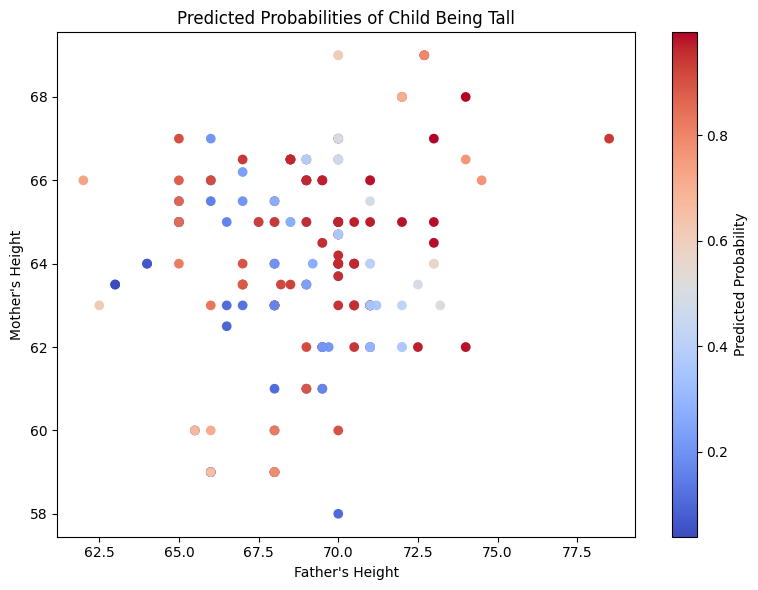

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select relevant features and target variable
X = data[['father', 'mother', 'gender']]
y = data['childHeight']

# Encode categorical variables (gender)
label_encoder = LabelEncoder()
X.loc[:, 'gender'] = label_encoder.fit_transform(X['gender'])

# Categorize child's height as tall (1) or short (0) based on a threshold
threshold = 65  # Example threshold (can be adjusted)
y = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Visualize the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=X_test['father'], y=X_test['mother'], c=y_pred_prob, cmap='coolwarm')
plt.xlabel("Father's Height")
plt.ylabel("Mother's Height")
plt.title("Predicted Probabilities of Child Being Tall")
plt.colorbar(scatter, label='Predicted Probability')
plt.tight_layout()
plt.show()

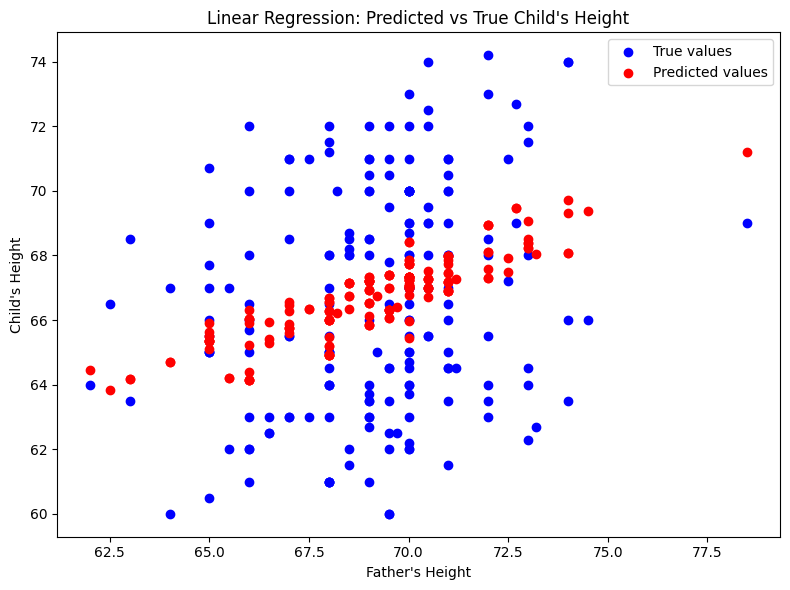

Mean Squared Error (MSE): 10.744255759132196


In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm

# # Load the Galton dataset
# data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# # Select relevant features and target variable
# X = data[['father', 'mother']]
# y = data['childHeight']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict child's height for the test set
# y_pred = model.predict(X_test)

# # Visualize the results
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test['father'], y_test, color='blue', label='True values')
# plt.scatter(X_test['father'], y_pred, color='red', label='Predicted values')
# plt.xlabel("Father's Height")
# plt.ylabel("Child's Height")
# plt.title("Linear Regression: Predicted vs True Child's Height")
# plt.legend()
# plt.tight_layout()
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select relevant features and target variable
X = data[['father', 'mother']]
y = data['childHeight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict child's height for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test['father'], y_test, color='blue', label='True values')
plt.scatter(X_test['father'], y_pred, color='red', label='Predicted values')
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.title("Linear Regression: Predicted vs True Child's Height")  # Include MSE in the title
plt.legend()
plt.tight_layout()
plt.show()

print("Mean Squared Error (MSE):", mse)  # Print MSE


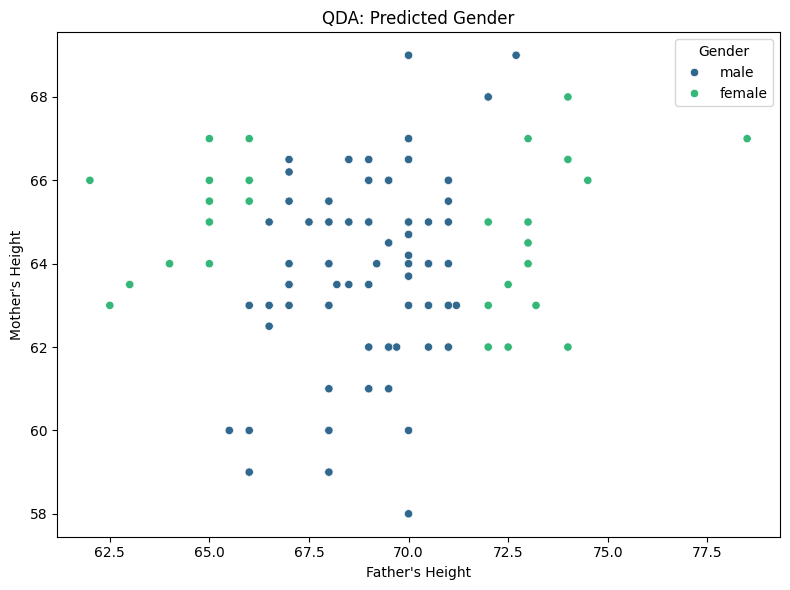

Classification Report:
              precision    recall  f1-score   support

      female       0.61      0.26      0.37        95
        male       0.52      0.83      0.64        92

    accuracy                           0.54       187
   macro avg       0.57      0.54      0.50       187
weighted avg       0.57      0.54      0.50       187

Confusion Matrix:
[[25 70]
 [16 76]]


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select relevant features and target variable
X = data[['father', 'mother']]
y = data['gender']  # Using gender as the target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = qda.predict(X_test_scaled)

# Visualize the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['father'], y=X_test['mother'], hue=y_pred, palette='viridis')
plt.xlabel("Father's Height")
plt.ylabel("Mother's Height")
plt.title("QDA: Predicted Gender")
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

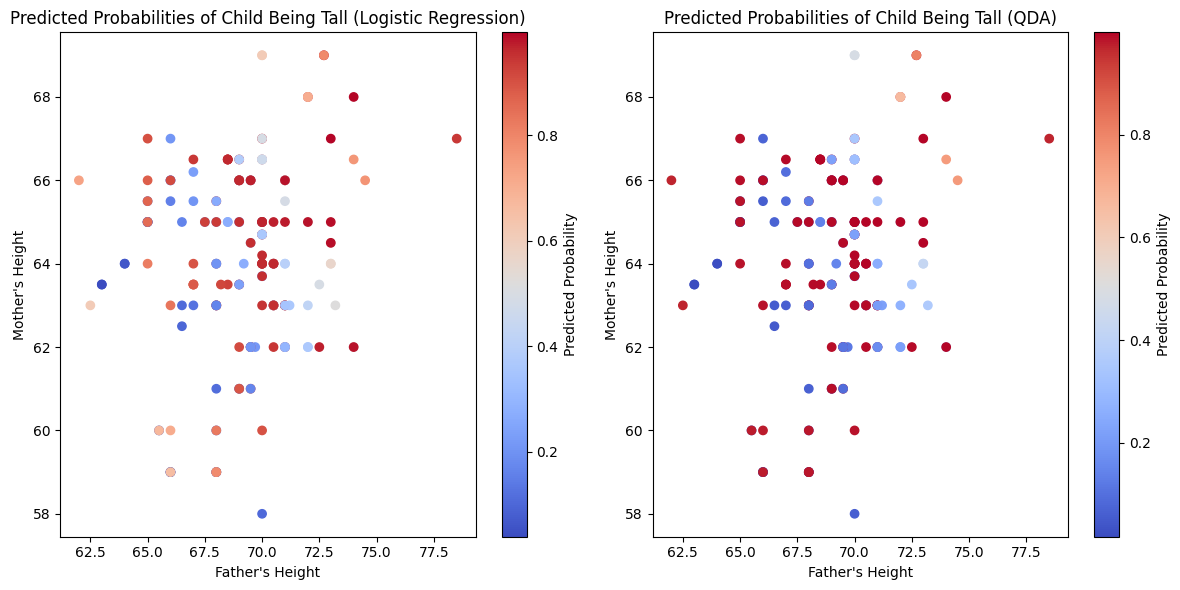

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select relevant features and target variable
X = data[['father', 'mother', 'gender']]
y = data['childHeight']

# Encode categorical variables (gender)
label_encoder = LabelEncoder()
X.loc[:, 'gender'] = label_encoder.fit_transform(X['gender'])

# Categorize child's height as tall (1) or short (0) based on a threshold
threshold = 65  # Example threshold (can be adjusted)
y = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Predict probabilities for the test set using logistic regression
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Predict probabilities for the test set using QDA
y_pred_prob_qda = qda_model.predict_proba(X_test)[:, 1]

# Visualize the results for logistic regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter_logistic = plt.scatter(x=X_test['father'], y=X_test['mother'], c=y_pred_prob_logistic, cmap='coolwarm')
plt.xlabel("Father's Height")
plt.ylabel("Mother's Height")
plt.title("Predicted Probabilities of Child Being Tall (Logistic Regression)")
plt.colorbar(scatter_logistic, label='Predicted Probability')

# Visualize the results for QDA
plt.subplot(1, 2, 2)
scatter_qda = plt.scatter(x=X_test['father'], y=X_test['mother'], c=y_pred_prob_qda, cmap='coolwarm')
plt.xlabel("Father's Height")
plt.ylabel("Mother's Height")
plt.title("Predicted Probabilities of Child Being Tall (QDA)")
plt.colorbar(scatter_qda, label='Predicted Probability')

plt.tight_layout()
plt.show()


Mean vector x of each column:
father             69.197109
mother             64.089293
midparentHeight    69.206773
children            6.171306
childNum            3.585653
childHeight        66.745931
dtype: float64


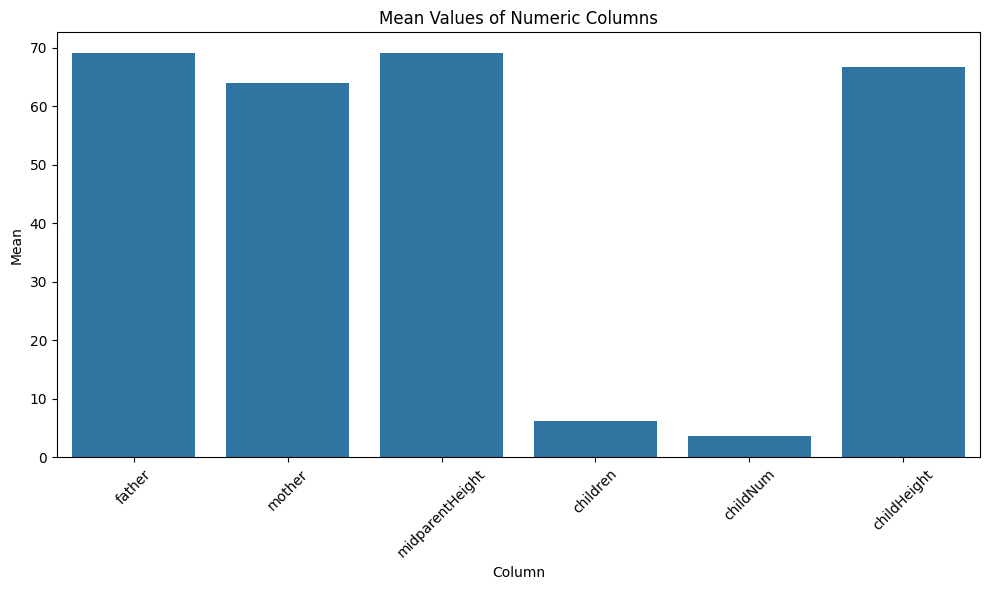

In [70]:
import pandas as pd

# Load the Galton dataset
galton_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Exclude non-numeric columns
numeric_data = galton_data.select_dtypes(include=['int', 'float'])

# Compute the mean vector x of each column
mean_vector = numeric_data.mean()

# Display the mean vector
print("Mean vector x of each column:")
print(mean_vector)

import seaborn as sns
import matplotlib.pyplot as plt

# Load the Galton dataset
galton_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Exclude non-numeric columns
numeric_data = galton_data.select_dtypes(include=['int', 'float'])

# Compute the mean vector x of each column
mean_vector = numeric_data.mean()

# Plot the mean values
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_vector.index, y=mean_vector.values)
plt.title('Mean Values of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Galton dataset
galton_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Preprocessing the data
X = galton_data[['father', 'mother']].values
y = galton_data['childHeight'].values  # Corrected column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Training the model
tree_reg.fit(X_train, y_train)

# Making predictions
y_pred = tree_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.732089683933026


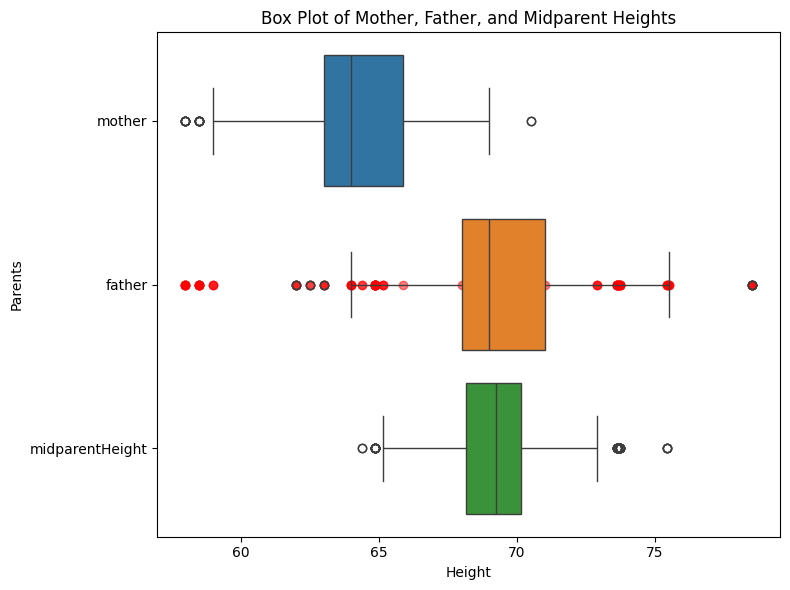

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select 'mother', 'father', and 'midparentHeight' features
X = data[['mother', 'father', 'midparentHeight']]

# Create a box plot for the selected features
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=X, orient="h")

# Find the outliers
outliers = [flier.get_data()[0] for flier in boxplot.get_children() if isinstance(flier, plt.Line2D)]

# Change outlier style to dots
for points in outliers:
    plt.scatter(points, [i + 1] * len(points), marker='o', color='r', alpha=0.5)

plt.title("Box Plot of Mother, Father, and Midparent Heights")
plt.xlabel("Height")
plt.ylabel("Parents")
plt.tight_layout()
plt.show()

In [28]:
import numpy as np
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select relevant features
X = data[['father', 'mother', 'midparentHeight']]

# Compute the covariance matrix
cov_matrix = np.cov(X.T)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[3.55271368e-15 9.33186337e+00 5.29778451e+00]

Eigenvectors:
[[ 0.40270234 -0.64807207  0.64640035]
 [ 0.43491853 -0.48590809 -0.75811556]
 [-0.80540468 -0.5864264  -0.08618223]]


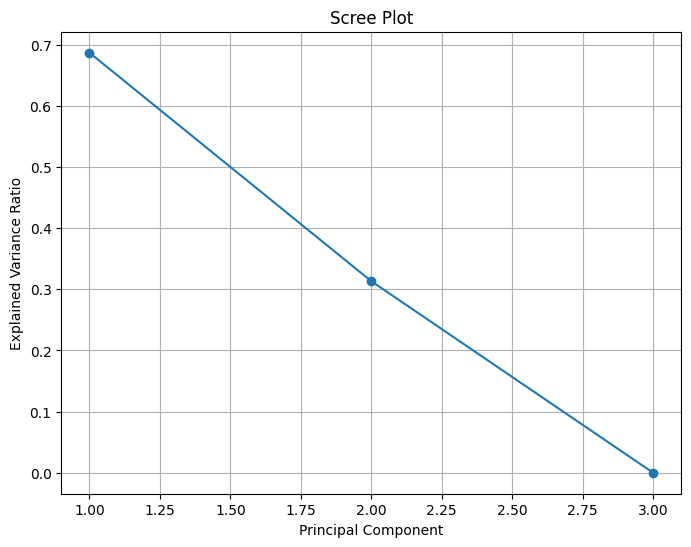

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select features for PCA
X = data[['mother', 'father', 'midparentHeight']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

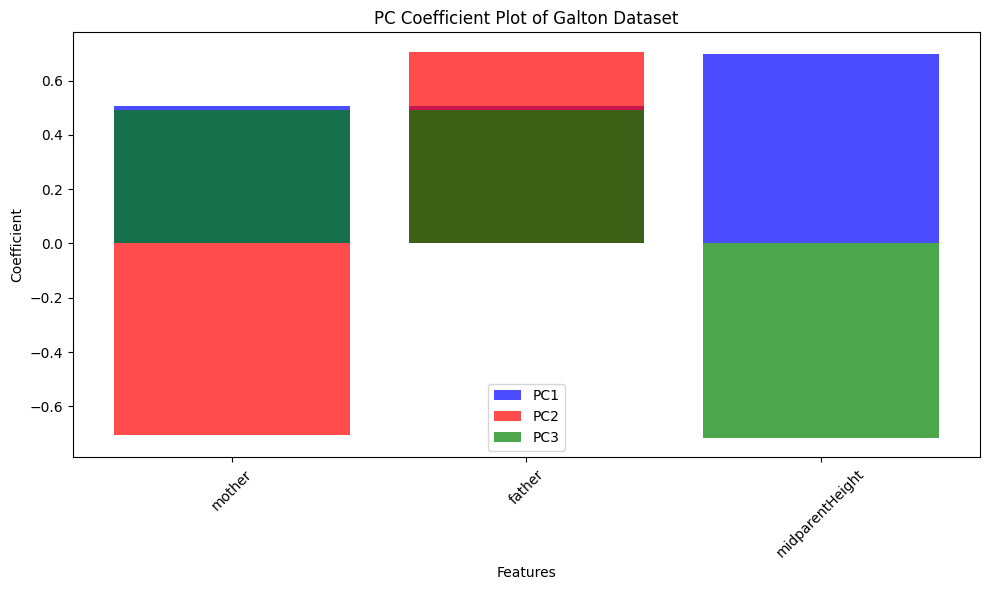

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select features for PCA
X = data[['mother', 'father', 'midparentHeight']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Extract the coefficients
coefficients = pca.components_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[0], color='blue', alpha=0.7, label='PC1')
plt.bar(range(len(coefficients)), coefficients[1], color='red', alpha=0.7, label='PC2')
plt.bar(range(len(coefficients)), coefficients[2], color='green', alpha=0.7, label='PC3')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('PC Coefficient Plot of Galton Dataset')
plt.legend()
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.tight_layout()
plt.show()

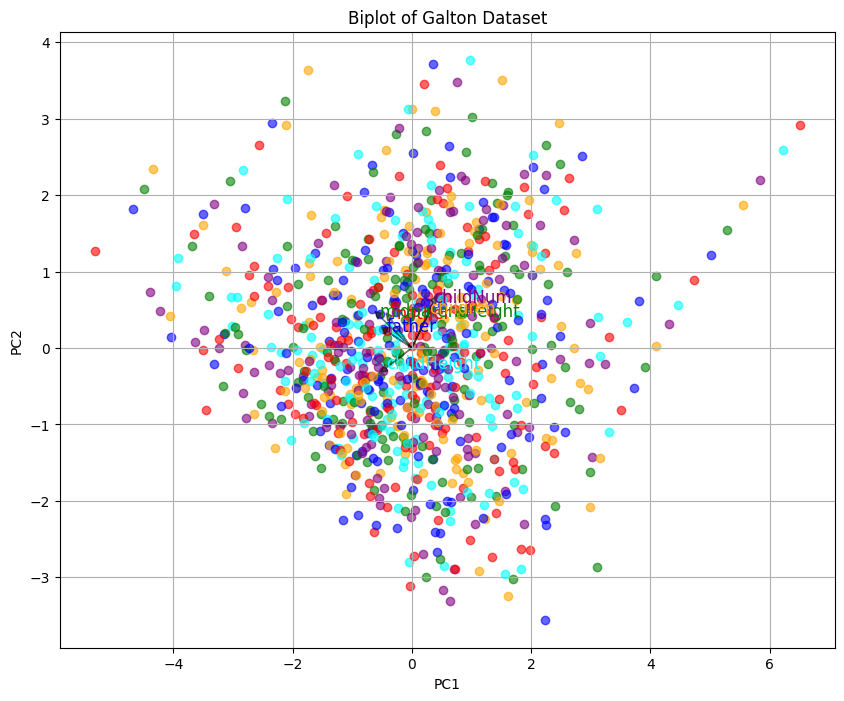

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select features for PCA
X = data[['mother', 'father', 'midparentHeight', 'children', 'childNum', 'childHeight']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # We choose 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Get the principal component loadings (coefficients)
pc_loadings = pca.components_.T  # Transpose to match the shape of original features

# Define colors for each feature
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Plot the biplot with different colors for data points
plt.figure(figsize=(10, 8))
for i, (pc1, pc2) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    plt.scatter(pc1, pc2, color=colors[i % len(colors)], alpha=0.6)  # Use modulo to cycle through colors

# Plot the feature vectors as arrows with black color and larger size
for i, (pc1, pc2) in enumerate(zip(pc_loadings[:, 0], pc_loadings[:, 1])):
    plt.arrow(0, 0, pc1, pc2, color='black', alpha=0.5, head_width=0.1, head_length=0.1)  # Increase head size
    plt.text(pc1, pc2, X.columns[i], color=colors[i], fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Galton Dataset')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Select features for PCA
X = data[['mother', 'father', 'midparentHeight', 'children', 'childNum', 'childHeight']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # We choose 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Get the principal component loadings (coefficients)
pc_loadings = pca.components_.T  # Transpose to match the shape of original features

# Extract coefficients for the first principal component (PC1)
a1, b1, c1, d1, e1, f1 = pc_loadings[:, 0]

# Extract coefficients for the second principal component (PC2)
a2, b2, c2, d2, e2, f2 = pc_loadings[:, 1]

print("Coefficients for the first principal component (PC1):")
print(f"a1: {a1}, b1: {b1}, c1: {c1}, d1: {d1}, e1: {e1}, f1: {f1}")

print("\nCoefficients for the second principal component (PC2):")
print(f"a2: {a2}, b2: {b2}, c2: {c2}, d2: {d2}, e2: {e2}, f2: {f2}")


Coefficients for the first principal component (PC1):
a1: -0.3637817987519234, b1: -0.42162941405878374, c1: -0.539348083185064, d1: 0.2846877478698894, e1: 0.36153384988414167, f1: -0.4327138163527711

Coefficients for the second principal component (PC2):
a2: 0.38486825435816313, b2: 0.22124077160929462, c2: 0.4161527706680732, d2: 0.45294437376860686, e2: 0.5970450018657529, f2: -0.26100666514247967


In [ ]:
import time
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Preprocessing (if necessary)

# Split the data into features and target
X = data.drop(columns=['family', 'gender'])
y = data['gender']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'ida': DecisionTreeClassifier(),
    'et': ExtraTreesClassifier(),
    'gbc': GradientBoostingClassifier(),
    'qda': QuadraticDiscriminantAnalysis(),
    'lightgbm': lgb.LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression(),
    'ridge': RidgeClassifier(),
    'nb': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'dummy': DummyClassifier(strategy='most_frequent')  # Choose appropriate strategy
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],
    'TT(sec)': []
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    start_time = time.time()
    pipe = make_pipeline(StandardScaler(), clf)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Append metrics to the dictionary
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['AUC'].append(auc)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1'].append(f1)
    metrics['Kappa'].append(kappa)
    metrics['MCC'].append(mcc)
    metrics['TT(sec)'].append(elapsed_time)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


In [69]:
import time
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm
from sklearn.decomposition import PCA

# Load the Galton dataset
data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Preprocessing (if necessary)

# Split the data into features and target
X = data.drop(columns=['family', 'gender'])
y = data['gender']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply PCA
# Apply PCA
pca = PCA(n_components='mle', svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize classifiers
classifiers = {
    'ida': DecisionTreeClassifier(),
    'et': ExtraTreesClassifier(),
    'gbc': GradientBoostingClassifier(),
    'qda': QuadraticDiscriminantAnalysis(),
    'lightgbm': lgb.LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression(),
    'ridge': RidgeClassifier(),
    'nb': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'dummy': DummyClassifier(strategy='most_frequent')  # Choose appropriate strategy
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],
    'TT(sec)': []
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    start_time = time.time()
    pipe = make_pipeline(StandardScaler(), clf)
    pipe.fit(X_train_pca, y_train)
    y_pred = pipe.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Append metrics to the dictionary
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['AUC'].append(auc)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1'].append(f1)
    metrics['Kappa'].append(kappa)
    metrics['MCC'].append(mcc)
    metrics['TT(sec)'].append(elapsed_time)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


[LightGBM] [Info] Number of positive: 389, number of negative: 358
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 747, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520750 -> initscore=0.083046
[LightGBM] [Info] Start training from score 0.083046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

c:\Users\Pooria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


       Model  Accuracy       AUC    Recall  Precision        F1     Kappa  \
0        ida  0.893048  0.892849  0.880435   0.900000  0.890110  0.785968   
1         et  0.914439  0.914245  0.902174   0.922222  0.912088  0.828774   
2        gbc  0.919786  0.919508  0.902174   0.932584  0.917127  0.839448   
3        qda  0.882353  0.882151  0.869565   0.888889  0.879121  0.764564   
4   lightgbm  0.919786  0.919508  0.902174   0.932584  0.917127  0.839448   
5         rf  0.914439  0.914245  0.902174   0.922222  0.912088  0.828774   
6        ada  0.877005  0.876888  0.869565   0.879121  0.874317  0.753905   
7         dt  0.887701  0.887243  0.858696   0.908046  0.882682  0.775150   
8         lr  0.903743  0.903547  0.891304   0.911111  0.901099  0.807371   
9      ridge  0.903743  0.903547  0.891304   0.911111  0.901099  0.807371   
10        nb  0.877005  0.876373  0.836957   0.905882  0.870056  0.753651   
11       knn  0.887701  0.887414  0.869565   0.898876  0.883978  0.775228   

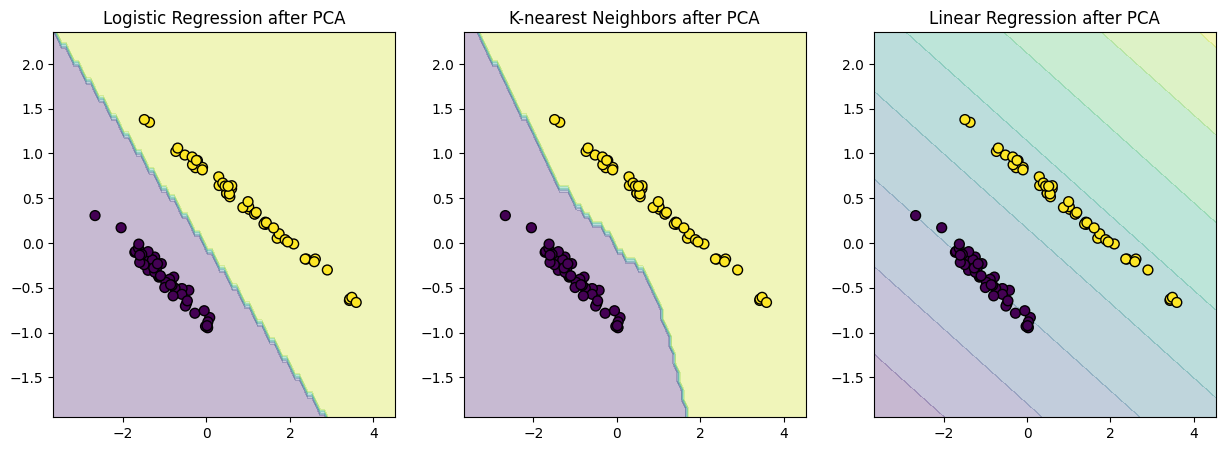

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate synthetic data
n_samples = 100
n_features = 2
n_informative = 2  # Choose according to the total number of features
n_redundant = 0    # Choose according to the total number of features
n_repeated = 0     # Choose according to the total number of features
n_classes = 2
n_clusters_per_class = 1
random_state = 42

# Generate synthetic data
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                           n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes,
                           n_clusters_per_class=n_clusters_per_class, random_state=random_state)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train models after PCA
lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_pca, y)

knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_pca, y)

lr_pca_model = LinearRegression()
lr_pca_model.fit(X_pca, y)

# Plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression decision boundary after PCA
Z_lr_pca = lr_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr_pca = Z_lr_pca.reshape(xx.shape)
axarr[0].contourf(xx, yy, Z_lr_pca, alpha=0.3)
axarr[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, edgecolor='k')
axarr[0].set_title('Logistic Regression after PCA')

# K-nearest Neighbors decision boundary after PCA
Z_knn_pca = knn_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn_pca = Z_knn_pca.reshape(xx.shape)
axarr[1].contourf(xx, yy, Z_knn_pca, alpha=0.3)
axarr[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, edgecolor='k')
axarr[1].set_title('K-nearest Neighbors after PCA')

# Linear Regression decision boundary after PCA
Z_lr_regr = lr_pca_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr_regr = Z_lr_regr.reshape(xx.shape)
axarr[2].contourf(xx, yy, Z_lr_regr, alpha=0.3)
axarr[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, edgecolor='k')
axarr[2].set_title('Linear Regression after PCA')

plt.show()


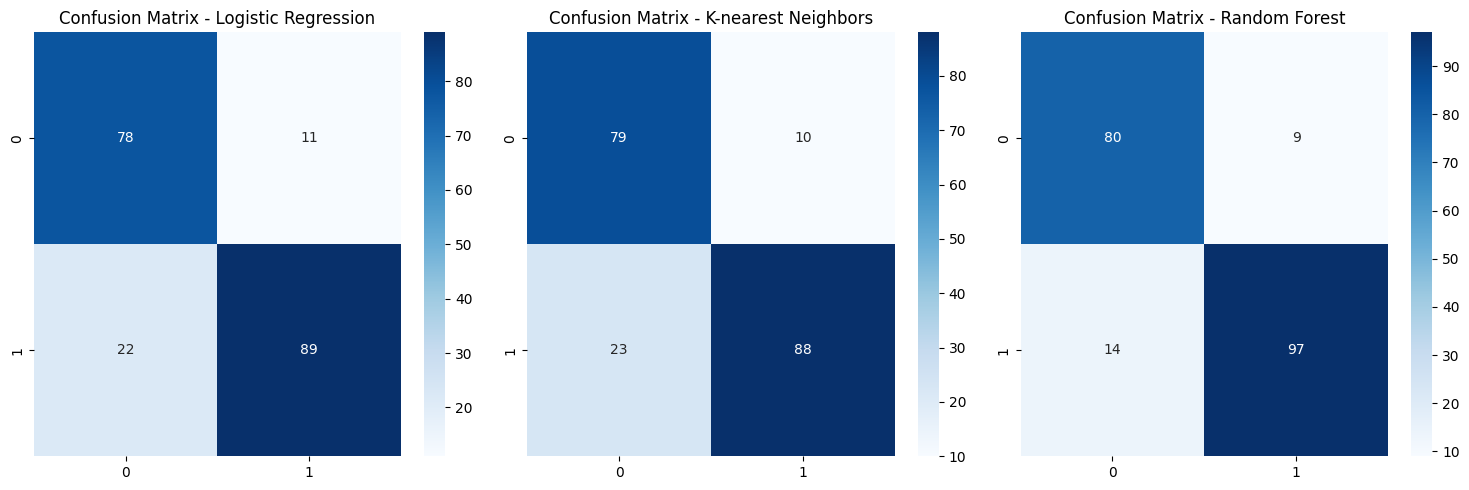

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train classifiers
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100)

lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict classes
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(1, 3, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-nearest Neighbors')

plt.subplot(1, 3, 3)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()


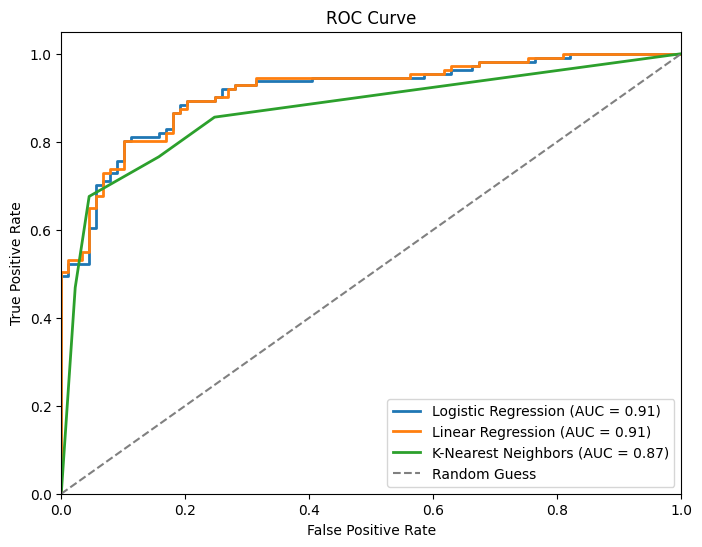

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)
    # Predict probabilities
    if name == 'Linear Regression':
        y_prob = clf.predict(X_test)  # Linear Regression does not have predict_proba method
    else:
        y_prob = clf.predict_proba(X_test)[:, 1]
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



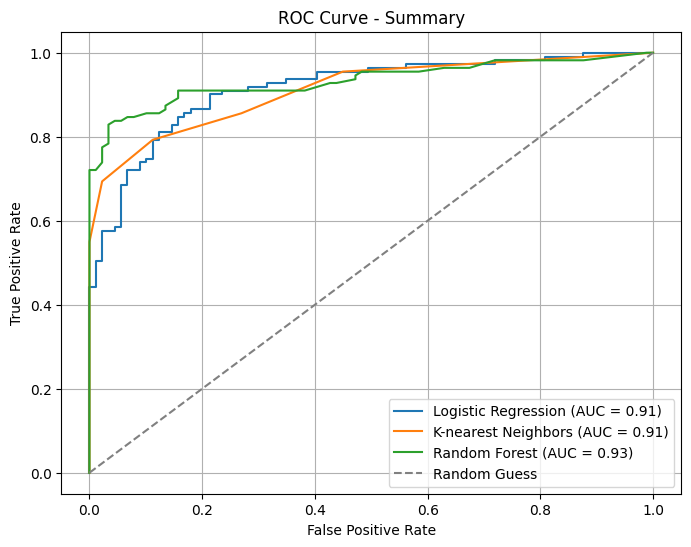

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train classifiers
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100)

lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Define classifiers and their predicted probabilities
classifiers = {
    'Logistic Regression': lr_model,
    'K-nearest Neighbors': knn_model,
    'Random Forest': rf_model
}

plt.figure(figsize=(8, 6))

# Plot ROC curves for each classifier
for name, clf in classifiers.items():
    # Get predicted probabilities for positive class
    y_prob = clf.predict_proba(X_test)[:, 1]
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Summary')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import shap
import matplotlib.pyplot as plt

# Load Galton dataset
galton_df = pd.read_csv("path_to_galton_dataset.csv")

# Prepare features and target
X = galton_df.drop(columns=["childHeight"])
y = galton_df["childHeight"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train > y_train.mean())  # Classification task: childHeight > mean(childHeight)

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Initialize SHAP Explainers for each model
lr_explainer = shap.Explainer(lr_model, X_train)
log_reg_explainer = shap.Explainer(log_reg_model, X_train)
knn_explainer = shap.Explainer(knn_model, X_train)

# Compute SHAP values for each model and the dataset
lr_shap_values = lr_explainer.shap_values(X_test)
log_reg_shap_values = log_reg_explainer.shap_values(X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

# Generate summary plot for linear regression model
shap.summary_plot(lr_shap_values, X_test, plot_type="bar", show=False)
plt.title("Summary Plot - Linear Regression Model")
plt.show()

# Generate summary plot for logistic regression model
shap.summary_plot(log_reg_shap_values, X_test, plot_type="bar", show=False)
plt.title("Summary Plot - Logistic Regression Model")
plt.show()

# Generate summary plot for KNN model
shap.summary_plot(knn_shap_values, X_test, show=False)
plt.title("Summary Plot - KNN Model")
plt.show()

# Select a single observation for force plot
sample_idx = 0  # Change the index as needed
sample_X = X_test.iloc[sample_idx]
sample_y = y_test.iloc[sample_idx]

# Generate force plot for linear regression model
shap.force_plot(lr_explainer.expected_value, lr_shap_values[sample_idx], sample_X, matplotlib=True)
plt.title("Force Plot - Linear Regression Model (Observation {})".format(sample_idx))
plt.show()

# Generate force plot for logistic regression model
shap.force_plot(log_reg_explainer.expected_value[1], log_reg_shap_values[sample_idx], sample_X, matplotlib=True)
plt.title("Force Plot - Logistic Regression Model (Observation {})".format(sample_idx))
plt.show()

# Generate force plot for KNN model
shap.force_plot(knn_explainer.expected_value, knn_shap_values[sample_idx], sample_X, matplotlib=True)
plt.title("Force Plot - KNN Model (Observation {})".format(sample_idx))
plt.show()

# Combine force plots for all models
shap.initjs()
shap.force_plot(
    (lr_explainer.expected_value, log_reg_explainer.expected_value[1], knn_explainer.expected_value),
    (lr_shap_values[sample_idx], log_reg_shap_values[sample_idx], knn_shap_values[sample_idx]),
    feature_names=X.columns.tolist(),
    matplotlib=True
)
plt.title("Combined Force Plot - All Models (Observation {})".format(sample_idx))
plt.show()

ModuleNotFoundError: No module named 'shap'

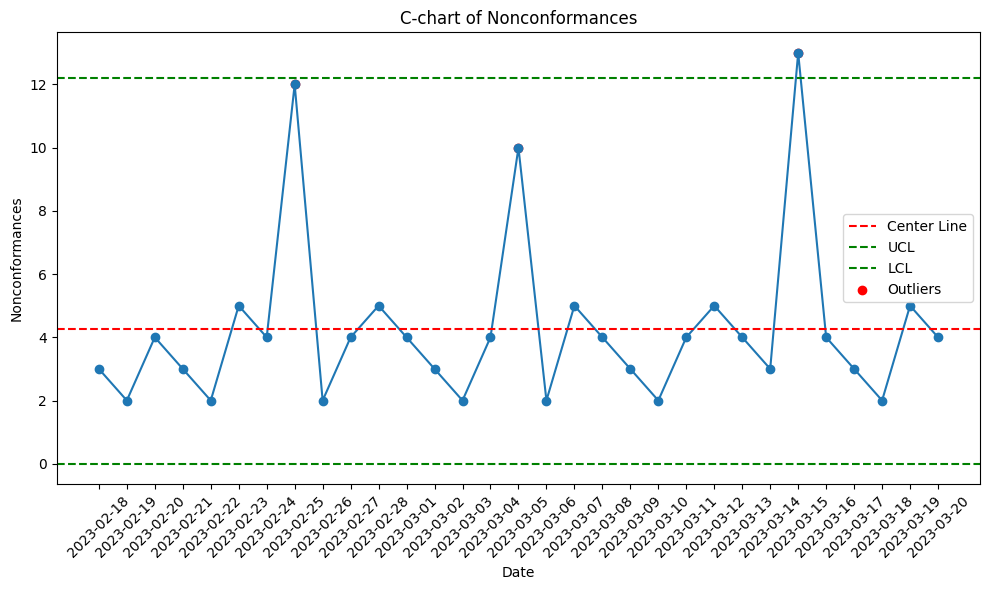

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (number of nonconformances per day)
dates = ['2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
         '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01',
         '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
         '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
         '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
         '2023-03-20']

nonconformances = [3, 2, 4, 3, 2, 5, 4, 3, 2, 4, 5, 4, 3, 2, 4, 3, 2, 5, 4, 3, 2, 4, 5, 4, 3, 2, 4, 3, 2, 5, 4]

# Introduce three outliers
outlier_indices = [7, 15, 25]  # Indices of points to be considered as outliers
outlier_values = [12, 10, 13]   # Values of the outliers
for idx, val in zip(outlier_indices, outlier_values):
    nonconformances[idx] = val

# Compute average number of nonconformances per unit
average_nonconformances = np.mean(nonconformances)

# Compute standard deviation
std_dev = np.std(nonconformances)

# Calculate upper and lower control limits (assuming a constant multiplier of 3 for simplicity)
UCL = average_nonconformances + 3 * std_dev
LCL = max(0, average_nonconformances - 3 * std_dev)  # Control limits can't be negative

# Plotting the C-chart
plt.figure(figsize=(10, 6))
plt.plot(dates, nonconformances, marker='o', linestyle='-')
plt.axhline(y=average_nonconformances, color='r', linestyle='--', label='Center Line')
plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
plt.scatter([dates[i] for i in outlier_indices], [nonconformances[i] for i in outlier_indices], color='red', label='Outliers')
plt.title('C-chart of Nonconformances')
plt.xlabel('Date')
plt.ylabel('Nonconformances')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Calculate upper and lower control limits
UCL = average_nonconformances + 3 * std_dev
LCL = max(0, average_nonconformances - 3 * std_dev)

# Calculate the center line value
center_line = average_nonconformances

print("Upper Control Limit (UCL):", UCL)
print("Lower Control Limit (LCL):", LCL)
print("Center Line Value:", center_line)


Upper Control Limit (UCL): 12.212408743755297
Lower Control Limit (LCL): 0
Center Line Value: 4.258064516129032
